# Demonstrating Curvature Estimates with GNPs

In [1]:
import torch
import numpy as np
import os
from pathlib import Path
import pyvista as pv

if Path.cwd().as_posix().endswith('/curvatures_01'):
    os.chdir('../..')
from gnp.estimator import GeometryEstimator

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
pv.set_jupyter_backend("static")

In [2]:
def get_data(data_name, noise_level=0.0, noise_ratio=0.0):
    data_path = os.path.join('example_data', data_name)
    data = {}
    for file in os.listdir(data_path):
        if file.endswith('.npy'):
            data[file[:-4]] = torch.from_numpy(np.load(os.path.join(data_path, file))).to(device)
    if noise_level > 0.0 and noise_ratio > 0.0:
        xyz = data['xyz']
        noise_inds = torch.randperm(xyz.shape[0])[:int(noise_ratio*xyz.shape[0])]
        noise = torch.randn_like(xyz[noise_inds]) * noise_level
        xyz[noise_inds] += noise
        data['xyz'] = xyz
    return data

Spot

In [ ]:
file = 'spot'

data_clean = get_data(file)
estimator_clean = GeometryEstimator(data_clean['xyz'], 
                              orientation=data_clean['normals'], 
                              device=device)
output_clean = estimator_clean.estimate_quantities(['mean_curvature', 'gaussian_curvature'])
mean_clean = output_clean['mean_curvature']
gauss_clean = output_clean['gaussian_curvature']

data_noise = get_data(file, noise_level=0.001, noise_ratio=1.)
estimator_noise = GeometryEstimator(data_noise['xyz'], 
                              orientation=data_noise['normals'], 
                              model='noise_70k',
                              device=device)
output_noise = estimator_noise.estimate_quantities(['mean_curvature', 'gaussian_curvature'])
mean_noise = output_noise['mean_curvature']
gauss_noise = output_noise['gaussian_curvature']

data_outlier = get_data(file, noise_level=0.005, noise_ratio=0.1)
estimator_outlier = GeometryEstimator(data_outlier['xyz'], 
                              orientation=data_outlier['normals'], 
                              model='outlier_50k',
                              device=device)
output_outlier = estimator_outlier.estimate_quantities(['mean_curvature', 'gaussian_curvature'])
mean_outlier = output_outlier['mean_curvature']
gauss_outlier = output_outlier['gaussian_curvature']

In [4]:
pvdata_clean = pv.PolyData(data_clean['xyz'].cpu().numpy())
pvdata_clean['mean_curvature'] = mean_clean.cpu().numpy()
pvdata_clean['gaussian_curvature'] = gauss_clean.cpu().numpy()

pvdata_noise = pv.PolyData(data_noise['xyz'].cpu().numpy())
pvdata_noise['mean_curvature'] = mean_noise.cpu().numpy()
pvdata_noise['gaussian_curvature'] = gauss_noise.cpu().numpy()

pvdata_outlier = pv.PolyData(data_outlier['xyz'].cpu().numpy())
pvdata_outlier['mean_curvature'] = mean_outlier.cpu().numpy()
pvdata_outlier['gaussian_curvature'] = gauss_outlier.cpu().numpy()


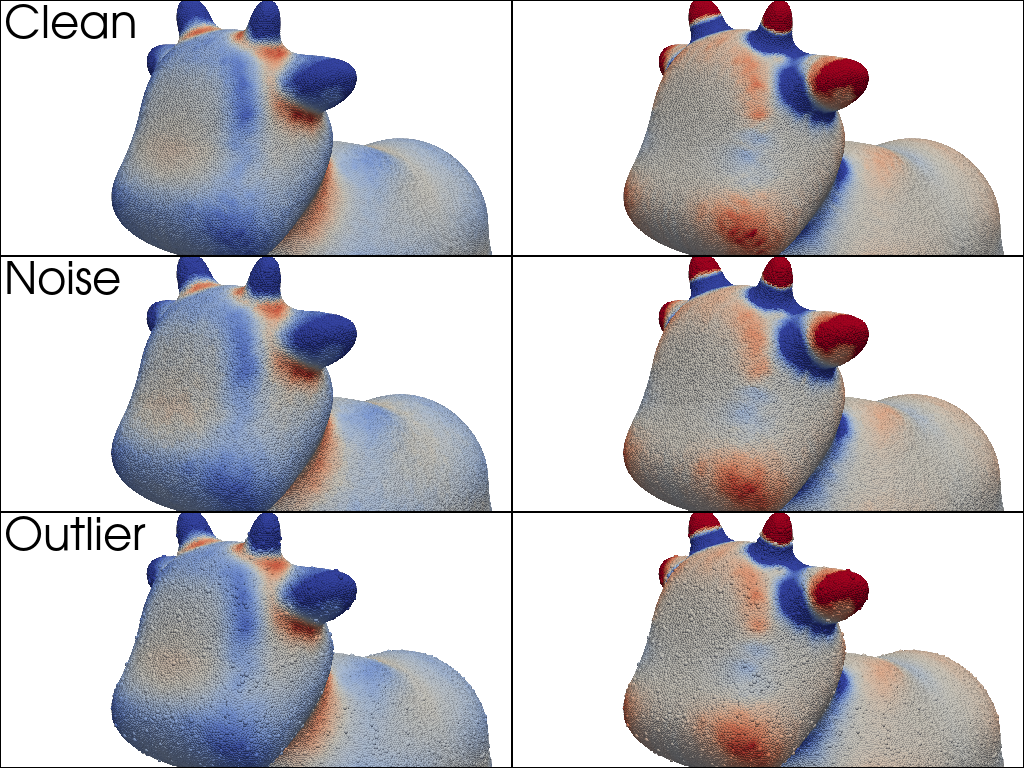

In [5]:
camera_pos = [(-4.2747469399128875, 2.433447240514654, -5.066554862481954),
              (0.41695975016338893, 0.7781268580732976, -0.21026674733759132),
              (0.10956421990950539, 0.9683588458227308, 0.2242249482829471)]
pv_datas = [pvdata_clean, pvdata_noise, pvdata_outlier]
titles = ['Clean', 'Noise', 'Outlier']
scalars = ['mean_curvature', 'gaussian_curvature']
lims = [5, 20]
plotter = pv.Plotter(shape=(3, 2))
for i, (pvdata, title) in enumerate(zip(pv_datas, titles)):
    for j, (scalar, lim) in enumerate(zip(scalars, lims)):
        plotter.subplot(i, j)
        if j == 0:
            plotter.add_text(title, font_size=18)
        plotter.add_points(pvdata, 
                           style='points', 
                           point_size=5, 
                           render_points_as_spheres=True,
                           cmap='coolwarm',
                           scalars=scalar, 
                           clim=[-lim, lim],
                           copy_mesh=True)
        plotter.camera_position = camera_pos
        plotter.camera.zoom(2)
        plotter.remove_scalar_bar()
plotter.show()

Radial Manifold

In [ ]:
file = 'radial'

data_clean = get_data(file)
estimator_clean = GeometryEstimator(data_clean['xyz'], 
                              orientation=data_clean['normals'], 
                              device=device)
output_clean = estimator_clean.estimate_quantities(['mean_curvature', 'gaussian_curvature'])
mean_clean = output_clean['mean_curvature']
gauss_clean = output_clean['gaussian_curvature']

data_noise = get_data(file, noise_level=0.001, noise_ratio=1.)
estimator_noise = GeometryEstimator(data_noise['xyz'], 
                              orientation=data_noise['normals'], 
                              model='noise_70k',
                              device=device)
output_noise = estimator_noise.estimate_quantities(['mean_curvature', 'gaussian_curvature'])
mean_noise = output_noise['mean_curvature']
gauss_noise = output_noise['gaussian_curvature']

data_outlier = get_data(file, noise_level=0.005, noise_ratio=0.1)
estimator_outlier = GeometryEstimator(data_outlier['xyz'], 
                              orientation=data_outlier['normals'], 
                              model='outlier_50k',
                              device=device)
output_outlier = estimator_outlier.estimate_quantities(['mean_curvature', 'gaussian_curvature'])
mean_outlier = output_outlier['mean_curvature']
gauss_outlier = output_outlier['gaussian_curvature']

In [7]:
pvdata_clean = pv.PolyData(data_clean['xyz'].cpu().numpy())
pvdata_clean['mean_curvature'] = mean_clean.cpu().numpy()
pvdata_clean['gaussian_curvature'] = gauss_clean.cpu().numpy()

pvdata_noise = pv.PolyData(data_noise['xyz'].cpu().numpy())
pvdata_noise['mean_curvature'] = mean_noise.cpu().numpy()
pvdata_noise['gaussian_curvature'] = gauss_noise.cpu().numpy()

pvdata_outlier = pv.PolyData(data_outlier['xyz'].cpu().numpy())
pvdata_outlier['mean_curvature'] = mean_outlier.cpu().numpy()
pvdata_outlier['gaussian_curvature'] = gauss_outlier.cpu().numpy()

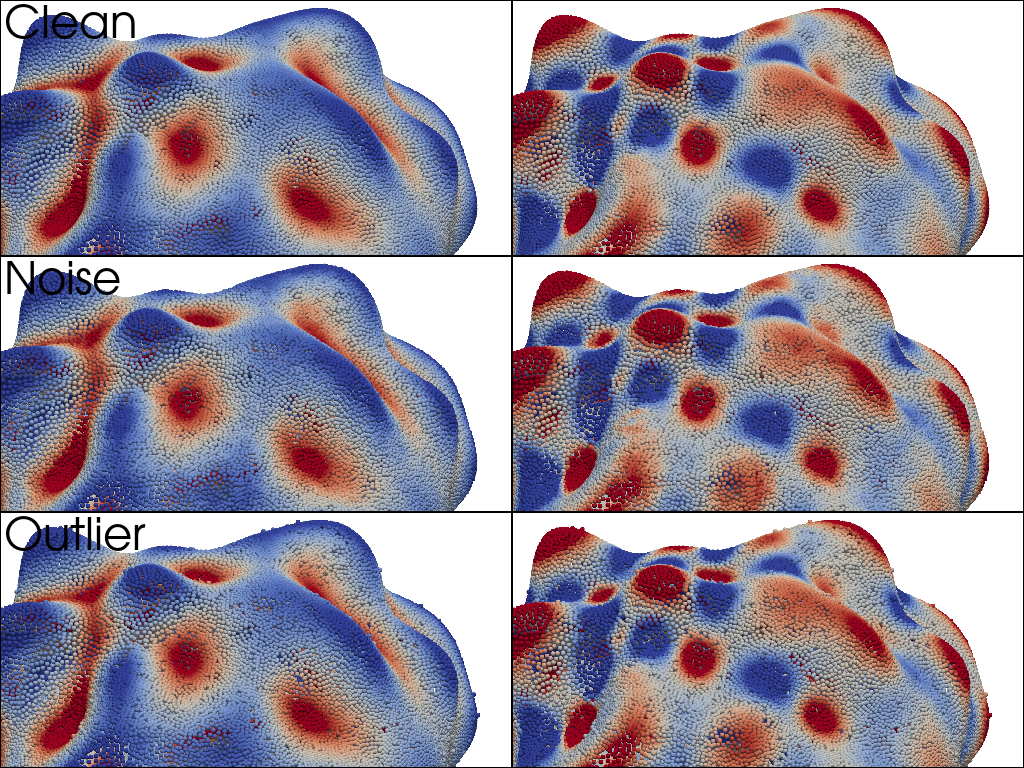

In [8]:
camera_pos = [(-0.2461291130217042, 2.723412374787658, 1.4497463043041612),
              (-0.529224605706013, -0.14200446959577848, 0.3632016145546438),
              (-0.45408635097920524, -0.276323009938202, 0.8470248992993549)]
pv_datas = [pvdata_clean, pvdata_noise, pvdata_outlier]
titles = ['Clean', 'Noise', 'Outlier']
scalars = ['mean_curvature', 'gaussian_curvature']
lims = [5, 20]
plotter = pv.Plotter(shape=(3, 2))
for i, (pvdata, title) in enumerate(zip(pv_datas, titles)):
    for j, (scalar, lim) in enumerate(zip(scalars, lims)):
        plotter.subplot(i, j)
        if j == 0:
            plotter.add_text(title, font_size=18)
        plotter.add_points(pvdata, 
                           style='points', 
                           point_size=5, 
                           render_points_as_spheres=True,
                           cmap='coolwarm',
                           scalars=scalar, 
                           clim=[-lim, lim],
                           copy_mesh=True)
        plotter.camera_position = camera_pos
        plotter.camera.zoom(1.5)
        plotter.remove_scalar_bar()
plotter.show()

Toroidal Manifold

In [ ]:
file = 'toroidal'

data_clean = get_data(file)
estimator_clean = GeometryEstimator(data_clean['xyz'], 
                              orientation=data_clean['normals'], 
                              device=device)
output_clean = estimator_clean.estimate_quantities(['mean_curvature', 'gaussian_curvature'])
mean_clean = output_clean['mean_curvature']
gauss_clean = output_clean['gaussian_curvature']

data_noise = get_data(file, noise_level=0.001, noise_ratio=1.)
estimator_noise = GeometryEstimator(data_noise['xyz'], 
                              orientation=data_noise['normals'], 
                              model='noise_70k',
                              device=device)
output_noise = estimator_noise.estimate_quantities(['mean_curvature', 'gaussian_curvature'])
mean_noise = output_noise['mean_curvature']
gauss_noise = output_noise['gaussian_curvature']

data_outlier = get_data(file, noise_level=0.005, noise_ratio=0.1)
estimator_outlier = GeometryEstimator(data_outlier['xyz'], 
                              orientation=data_outlier['normals'], 
                              model='outlier_50k',
                              device=device)
output_outlier = estimator_outlier.estimate_quantities(['mean_curvature', 'gaussian_curvature'])
mean_outlier = output_outlier['mean_curvature']
gauss_outlier = output_outlier['gaussian_curvature']

In [10]:
pvdata_clean = pv.PolyData(data_clean['xyz'].cpu().numpy())
pvdata_clean['mean_curvature'] = mean_clean.cpu().numpy()
pvdata_clean['gaussian_curvature'] = gauss_clean.cpu().numpy()

pvdata_noise = pv.PolyData(data_noise['xyz'].cpu().numpy())
pvdata_noise['mean_curvature'] = mean_noise.cpu().numpy()
pvdata_noise['gaussian_curvature'] = gauss_noise.cpu().numpy()

pvdata_outlier = pv.PolyData(data_outlier['xyz'].cpu().numpy())
pvdata_outlier['mean_curvature'] = mean_outlier.cpu().numpy()
pvdata_outlier['gaussian_curvature'] = gauss_outlier.cpu().numpy()

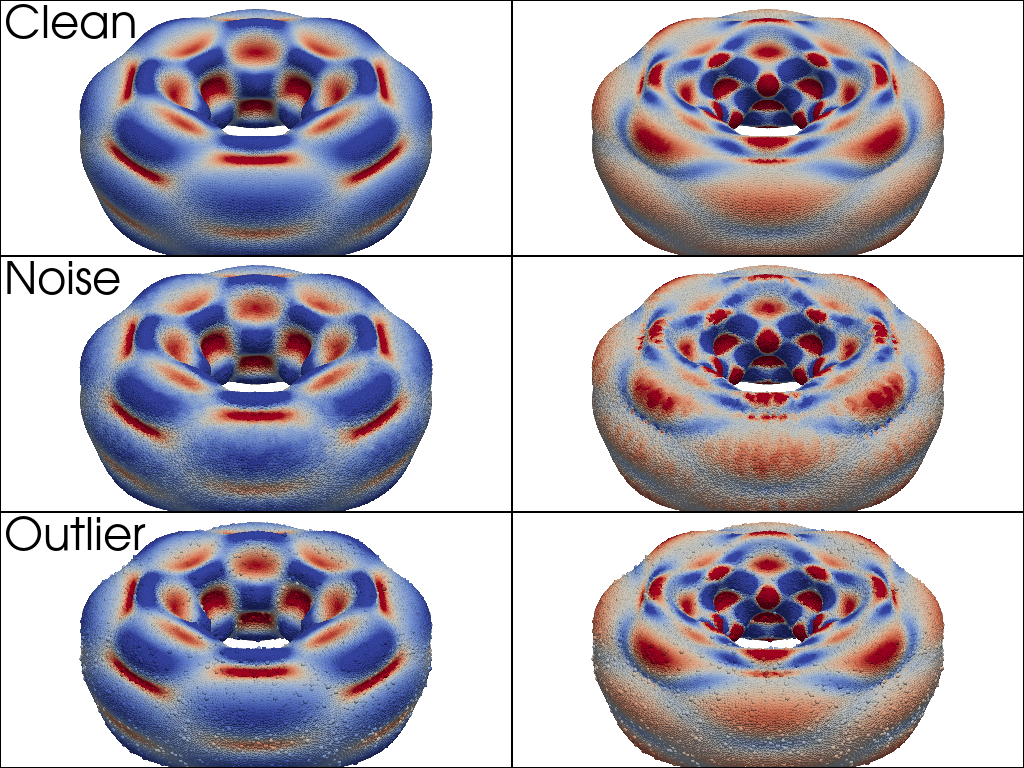

In [11]:
pv_datas = [pvdata_clean, pvdata_noise, pvdata_outlier]
titles = ['Clean', 'Noise', 'Outlier']
scalars = ['mean_curvature', 'gaussian_curvature']
lims = [5, 20]
plotter = pv.Plotter(shape=(3, 2))
for i, (pvdata, title) in enumerate(zip(pv_datas, titles)):
    for j, (scalar, lim) in enumerate(zip(scalars, lims)):
        plotter.subplot(i, j)
        if j == 0:
            plotter.add_text(title, font_size=18)
        plotter.add_points(pvdata, 
                           style='points', 
                           point_size=5, 
                           render_points_as_spheres=True,
                           cmap='coolwarm',
                           scalars=scalar, 
                           clim=[-lim, lim],
                           copy_mesh=True)
        
        plotter.camera.zoom(2)
        plotter.remove_scalar_bar()
plotter.show()